<a href="https://colab.research.google.com/github/vishalrk1/DIP-Assignments/blob/main/DIP_Sobel_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Downloading Image
!wget https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png

--2022-04-27 06:34:20--  https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘Lenna_(test_image).png’

Lenna_(test_image). 100%[===================>] 462.73K  1.95MB/s    in 0.2s    

2022-04-27 06:34:21 (1.95 MB/s) - ‘Lenna_(test_image).png’ saved [473831/473831]



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math
import cmath
import time
import cv2
from google.colab.patches import cv2_imshow
import csv
from numpy import binary_repr
from fractions import gcd


def generateRowColumnSobelGradients():
    """Generates the x-component and y-component of Sobel operators."""
    rowGradient = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    colGradient = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    return rowGradient, colGradient

def computeSobel(imge):
    """Computes and applies Sobel operator to an image."""
    N = imge.shape[0]
    result = np.zeros([N, N], dtype=float)
    
    #Copy the first and last rows, first and last columns
    result[0, :] = imge[0, :]
    result[:, 0] = imge[:, 0]
    result[N-1, :] = imge[N-1, :]
    result[:, N-1] = imge[:, N-1]
    
    #Generate the Row and Column Gradients of Sober.
    rowGradient, colGradient = generateRowColumnSobelGradients()
    
    #Sober Operator to the image.
    for i in np.arange(1, N-1):
        for j in np.arange(1, N-1):
            subImge = imge[i-1:i+2, j-1:j+2]
            rowSum = np.sum(rowGradient * subImge)
            colSum = np.sum(colGradient * subImge)
            result[i, j] = math.sqrt(rowSum**2 + colSum**2)
    
    return result


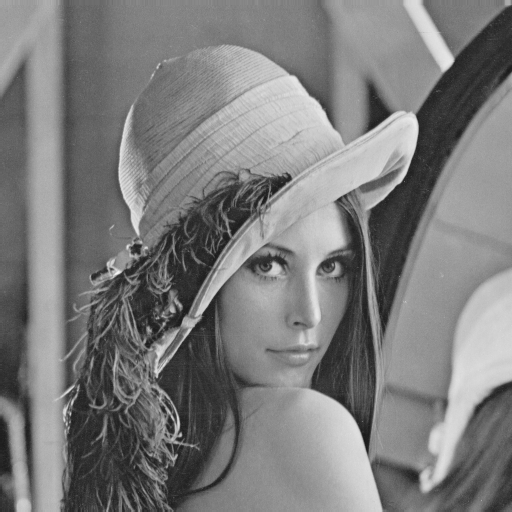

In [ ]:
img=np.array(Image.open("/content/Lenna_(test_image).png").convert("L"))
cv2_imshow(img)

In [ ]:
sobImge = computeSobel(img)

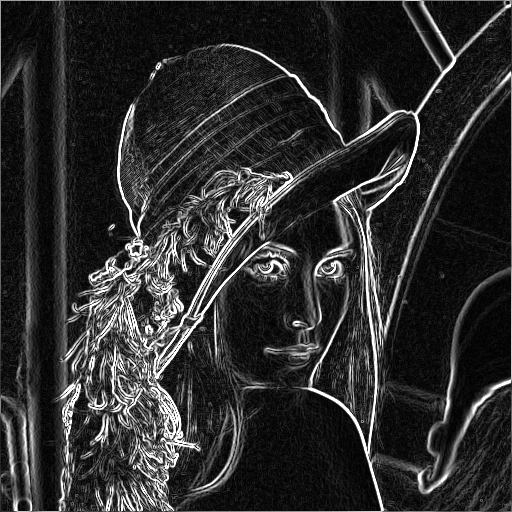

In [ ]:
cv2_imshow(sobImge)